In [1]:
# import os
# os.chdir(path to directory)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('cleaned_data_eemis.csv')
df.head()

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years
0,5 KMG INTERNATIONAL LTD,https://eemis.mglsd.go.ug/companies/5KMGINTERN...,OLD KAMPALA,NaN,+256-709-696959,"15 Apr, 2024 - 14 Apr, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,E24040010,15/4/2024,14/4/2026,"KAMPALA, UGANDA, Kampala, Uganda",Uganda,+256-709-696959,5kmgint@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.314897,32.569796,Kampala,Uganda,0.315169,32.581631,Kampala,Uganda,0.314897,32.569796,NaN,NaN
1,AALAM ALTASHIRAT RECRUITMENT,https://eemis.mglsd.go.ug/companies/AALAMALTAS...,https://www.google.com/maps?sca_esv=567294360&...,NaN,+966-568-785468,"25 Nov, 2024 - 24 Nov, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,SA24110028,25/11/2024,24/11/2026,"Riyadh, Saudi Arabia",Saudi Arabia,+966-568-785468,aalamaltashirat@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saudi Arabia,False,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,24.713552,46.675296,Riyadh,Saudi Arabia,24.713552,46.675296,NaN,NaN
2,ABBA PLACEMENTS RECRUITMENT AGENCY LTD,https://eemis.mglsd.go.ug/companies/ABBAPLACEM...,NEXT TO UGANDA SWEATERS AFTER TOTAL KAMWOKYA,NaN,+256-760-863622,"20 Jan, 2023 - 19 Jan, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,E23010018,20/1/2023,19/1/2025,"Kampala, Uganda",Uganda,+256-760-863622,abbaplacements@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.339221,32.586694,Kampala Central Division,Uganda,0.315169,32.581631,Kampala,Uganda,0.339221,32.586694,NaN,NaN
3,ABDULLAH YOUSAF ALMAZROUA RECRUITMENT OFFICE,https://eemis.mglsd.go.ug/companies/AbdullahYo...,"Riyadh ,Saudi Arabia",Saudi Arabia,+966-559-252000,"01 Aug, 2024 - 31 Jul, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,SA24080002,01/8/2024,31/7/2026,"Ar Riyad, Saudi Arabia",Saudi Arabia,+966-559-252000,A.y.966ksa@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saudi Arabia,False,NaN,NaN,NaN,0.0,0.0,24.713552,46.675296,SA,Saudi Arabia,24.713552,46.675296,Riyadh,Saudi Arabia,24.713552,46.675296,NaN,NaN
4,ABS CONSULTING GROUP LIMITED,https://eemis.mglsd.go.ug/companies/ABSCONSULT...,PILKINGTON ROAD,NaN,+256-414-255405,"31 Jul, 2023 - 30 Jul, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,E23070023,31/7/2023,30/7/2025,"Kampala, Uganda",Uganda,+256-414-255405,absconsultinggroup9@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.314120,32.582295,Kampala,Uganda,0.315169,32.581631,Kampala,Uganda,0.314120,32.582295,NaN,NaN


In [3]:
df.shape

(500, 50)

In [4]:
df['job_description'] = df['job_overview'] + ' ' + df['job_description_details']

In [5]:
df.dtypes

company_name                                  object
company_url_eemis                             object
company_location_companies_page               object
company_country_companies_page                object
company_phone_companies_page                  object
company_calendar                              object
logo_link                                     object
license_no                                    object
start_date_company_page_DDMMYYYY              object
expiry_date_company_page_DDMMYYYY             object
company_address_company_page                  object
company_country_company_page                  object
company_phone_company_page                    object
company_email_company_page                    object
active_company                                  bool
job_name_jobs_list                            object
job_page_link                                 object
jobs_country_jobs_list                        object
job_posted_date                               

## How many companies list the same country on both the list of companies page and their individual company pages?

In [6]:
df['company_country_company_page'].value_counts()

company_country_company_page
Uganda                   306
Saudi Arabia             158
United Arab Emirates      26
Qatar                      7
Iraq                       3
Name: count, dtype: int64

In [7]:
df['country_company_location_companies_page'].value_counts()

country_company_location_companies_page
Uganda                   241
Saudi Arabia             139
United Arab Emirates       5
Qatar                      4
Iraq                       2
United States              2
Pakistan                   1
13214                      1
A1E                        1
Romania                    1
N0A 1P0                    1
14222                      1
4112                       1
P.O.BOX 7106, KAMPALA      1
Ethiopia                   1
3670                       1
32253                      1
4431                       1
13342                      1
Name: count, dtype: int64

### ^ This doesn't seem right. Some more cleaning is necessary first

In [8]:
df['country_company_location_companies_page'] = df['country_company_location_companies_page'].str.replace(r'\d+', '', regex=True)

In [9]:
df['country_company_location_companies_page'].value_counts()

country_company_location_companies_page
Uganda                  241
Saudi Arabia            139
                          7
United Arab Emirates      5
Qatar                     4
Iraq                      2
United States             2
Ethiopia                  1
P.O.BOX , KAMPALA         1
Pakistan                  1
NA P                      1
Romania                   1
AE                        1
Name: count, dtype: int64

In [11]:
df['country_company_location_companies_page'] = df['country_company_location_companies_page'].str.replace(r'.*[A-Z]{2,}.*', '', regex=True)

In [12]:
df['country_company_location_companies_page'].value_counts()

country_company_location_companies_page
Uganda                  255
Saudi Arabia            131
                         12
United Arab Emirates      7
Qatar                     4
Iraq                      2
United States             2
Ethiopia                  1
Romania                   1
Pakistan                  1
Name: count, dtype: int64

### It's still making a few mistakes, especially for the lower numbers - United States, Ethiopia, Romania and Pakistan are all wrong, looking at the column 'company_location_companies_page'.

In [10]:
df[df['country_company_location_companies_page'] == 'Pakistan']

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years,job_description
204,GHANIYU-MUGHNIYU LIMITED,https://eemis.mglsd.go.ug/companies/Ghaniyu-Mu...,Plot 570,NaN,+256-741-480000,"04 Nov, 2024 - 03 Nov, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,E24110004,04/11/2024,03/11/2026,"Kampala, Uganda",Uganda,+256-741-480000,ghaniyumughniyu@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,24.837113,67.142109,Sector 33/E,Pakistan,0.315169,32.581631,Kampala,Uganda,24.837113,67.142109,NaN,NaN,NaN


In [11]:
df[df['country_company_location_companies_page'] == 'United States']

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years,job_description
292,LABOUR WORLD CONNECT LIMITED,https://eemis.mglsd.go.ug/companies/LABOURWORL...,VALLEY ROAD PLOT 585,NaN,+256-774-941495,"29 Apr, 2024 - 28 Apr, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,E24040017,29/4/2024,28/4/2026,"Kampala, Uganda",Uganda,+256-774-941495,labourworldconnect@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,40.858802,-74.196669,US,United States,0.315169,32.581631,Kampala,Uganda,40.858802,-74.196669,NaN,NaN,NaN
324,MIGADDE INTERNATIONAL LTD,https://eemis.mglsd.go.ug/companies/MIGADDEINT...,73654,NaN,+256-706-212748,"11 Jun, 2023 - 10 Jun, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,E23060004,11/6/2023,10/6/2025,"Kampala, Uganda",Uganda,+256-706-212748,migaddeinternationalltd@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,35.850289,-99.411720,OK,United States,0.315169,32.581631,Kampala,Uganda,35.850289,-99.411720,NaN,NaN,NaN


In [12]:
df[df['country_company_location_companies_page'] == 'Romania']

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years,job_description
217,HAFIITH ENTERPRISES LTD,https://eemis.mglsd.go.ug/companies/HAFIITHENT...,107063,NaN,+256-704-110429,"21 Feb, 2023 - 20 Feb, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,E23020011,21/2/2023,20/2/2025,"Wakiso, Uganda",Uganda,+256-704-110429,hafiithenterprises@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,44.911804,26.089104,Berceni,Romania,0.398281,32.479744,Wakiso,Uganda,44.911804,26.089104,NaN,NaN,NaN


In [13]:
df[df['country_company_location_companies_page'] == 'Ethiopia']

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years,job_description
76,ALRAKAEZ ALBASHARE RECRUITMENT OFFICE,https://eemis.mglsd.go.ug/companies/AlrakaezAl...,https://www.google.com/maps/place/26%C2%B003'5...,NaN,+966-504-359005,"31 Jul, 2023 - 31 Jul, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,SA1048,31/7/2023,31/7/2025,"Al-Qassim, Saudi Arabia",Saudi Arabia,+966-504-359005,alrakaezalbashare@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saudi Arabia,False,NaN,NaN,NaN,0.0,0.0,9.050536,38.880184,Addis Ababa,Ethiopia,26.207826,43.483738,NaN,Saudi Arabia,9.050536,38.880184,NaN,NaN,NaN


### But starting from Iraq and Qatar it seems pretty accurate.

In [14]:
df[df['country_company_location_companies_page'] == 'Iraq']

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years,job_description
23,AL GHADEER PRIVATE SECURITY,https://eemis.mglsd.go.ug/companies/AlGhadeerP...,"Safwan, Basra, Iraq",Iraq,+964-704-256916,"09 May, 2023 - 09 May, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,IQ23050022,09/5/2023,09/5/2025,"Al Basrah, Iraq",Iraq,+964-704-256916,business.development.manager@gsciq.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iraq,False,NaN,NaN,NaN,0.0,0.0,30.109716,47.719386,Basra Governorate,Iraq,30.525995,47.773789,Basrah,Iraq,30.109716,47.719386,NaN,NaN,NaN
25,AL KHALID RECRUITMENT,https://eemis.mglsd.go.ug/companies/ALKHALIDRE...,"4MVA+8HP, Zakho, Iraq",Iraq,+964-751-890996,"09 May, 2023 - 09 May, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,IQ23050023,09/5/2023,09/5/2025,"Baghdad, Iraq",Iraq,+964-751-890996,km6943200@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iraq,False,NaN,NaN,NaN,0.0,0.0,37.150462,42.672677,Kurdistan,Iraq,33.315241,44.366067,Baghdad,Iraq,37.150462,42.672677,NaN,NaN,NaN


In [15]:
df[df['country_company_location_companies_page'] == 'Qatar']

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years,job_description
50,ALI BIN ALI HOLDING WLL,https://eemis.mglsd.go.ug/companies/AliBinAliH...,"Ali Bin Ali Tower, Airport Road, أم غويلينة، ا...",NaN,+974-311-096363,"05 Aug, 2024 - 05 Aug, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,QA24080004,05/8/2024,05/8/2026,"Ad Dawhah, Qatar",Qatar,+974-311-096363,bob.mathews@alibinali.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qatar,False,NaN,NaN,NaN,0.0,0.0,25.273323,51.544395,الدوحة,Qatar,25.285447,51.53104,Doha,Qatar,25.273323,51.544395,NaN,NaN,NaN
131,COMPASS CATERING SERVICES WLL,https://eemis.mglsd.go.ug/companies/COMPASSCAT...,compass catering qatar,NaN,+097-455-401814,"11 Jul, 2024 - 11 Jul, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,QA24070006,11/7/2024,11/7/2026,"Doha, Qatar",Qatar,+097-455-401814,RECRUITMENT@COMPASSQATAR.COM.QA,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qatar,False,NaN,NaN,NaN,0.0,0.0,25.277116,51.508514,فريج النصر 39,Qatar,25.285447,51.53104,Doha,Qatar,25.277116,51.508514,NaN,NaN,NaN
403,SAMAM SPECIAL SECURITY SERVICES WLL,https://eemis.mglsd.go.ug/companies/SAMAMSPECI...,"Office Villa Building 15, Umm Lekhba, Near Lan...",NaN,+974-044-146655,"23 Apr, 2023 - 23 Apr, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,QA23040016,23/4/2023,23/4/2025,"Doha, Qatar",Qatar,+974-044-146655,samamsec256@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qatar,False,NaN,NaN,NaN,0.0,0.0,25.347697,51.467498,Doha Municipality,Qatar,25.285447,51.53104,Doha,Qatar,25.347697,51.467498,NaN,NaN,NaN
425,"SOC, LLC",https://eemis.mglsd.go.ug/companies/SOCLLC_273...,"WXRR+VQ Lusail West, Qatar",Qatar,+___-___-______,"17 Oct, 2024 - 17 Oct, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,QA24100006,17/10/2024,17/10/2026,"Doha, Qatar",Qatar,+___-___-______,WPSDohaALSS@soc-usa.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Qatar,False,NaN,NaN,NaN,0.0,0.0,24.942187,50.991937,Zone 96,Qatar,25.285447,51.53104,Doha,Qatar,24.942187,50.991937,NaN,NaN,NaN


## I removed the wrong countries manually:

In [16]:
mask = df['country_company_location_companies_page'] == 'Pakistan'

df.loc[mask, 'country_company_location_companies_page'] = \
    df['country_company_location_companies_page'].astype(str).str.replace('Pakistan', '', regex=True)

df.loc[mask, 'latitude_company_location_companies_page'] = \
    df['latitude_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)

df.loc[mask, 'longitude_company_location_companies_page'] = \
    df['longitude_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)

df.loc[mask, 'city_company_location_companies_page'] = \
    df['city_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)


/var/folders/mb/f5zh4qyd6sbf171lrlnmff040000gn/T/ipykernel_76907/3250560072.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'latitude_company_location_companies_page'] = \
/var/folders/mb/f5zh4qyd6sbf171lrlnmff040000gn/T/ipykernel_76907/3250560072.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'longitude_company_location_companies_page'] = \


In [17]:
mask = df['country_company_location_companies_page'] == 'United States'

df.loc[mask, 'country_company_location_companies_page'] = \
    df['country_company_location_companies_page'].astype(str).str.replace('United States', '', regex=True)

df.loc[mask, 'latitude_company_location_companies_page'] = \
    df['latitude_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)

df.loc[mask, 'longitude_company_location_companies_page'] = \
    df['longitude_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)

df.loc[mask, 'city_company_location_companies_page'] = \
    df['city_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)


In [18]:
mask = df['country_company_location_companies_page'] == 'Romania'

df.loc[mask, 'country_company_location_companies_page'] = \
    df['country_company_location_companies_page'].astype(str).str.replace('Romania', '', regex=True)

df.loc[mask, 'latitude_company_location_companies_page'] = \
    df['latitude_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)

df.loc[mask, 'longitude_company_location_companies_page'] = \
    df['longitude_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)

df.loc[mask, 'city_company_location_companies_page'] = \
    df['city_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)


In [19]:
mask = df['country_company_location_companies_page'] == 'Ethiopia'

df.loc[mask, 'country_company_location_companies_page'] = \
    df['country_company_location_companies_page'].astype(str).str.replace('Ethiopia', '', regex=True)

df.loc[mask, 'latitude_company_location_companies_page'] = \
    df['latitude_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)

df.loc[mask, 'longitude_company_location_companies_page'] = \
    df['longitude_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)

df.loc[mask, 'city_company_location_companies_page'] = \
    df['city_company_location_companies_page'].astype(str).str.replace(r'.+', '', regex=True)


In [20]:
df['country_company_location_companies_page'].value_counts()

country_company_location_companies_page
Uganda                  241
Saudi Arabia            139
                         12
United Arab Emirates      5
Qatar                     4
Iraq                      2
P.O.BOX , KAMPALA         1
NA P                      1
AE                        1
Name: count, dtype: int64

## How many rows contain the same country in the companies list and individual company page? 

In [21]:
df_filter_countries = df[df['company_country_companies_page'].notna() & df['company_country_company_page'].notna()]

In [22]:
df_filter_countries[df_filter_countries['company_country_companies_page'].str.strip().str.lower() == df_filter_countries['company_country_company_page'].str.strip().str.lower()]['company_country_company_page'].value_counts()

company_country_company_page
Saudi Arabia     88
Uganda           26
Iraq              2
Qatar             1
Name: count, dtype: int64

In [23]:
df_filter_countries[df_filter_countries['company_country_companies_page'].str.strip().str.lower() == df_filter_countries['company_country_company_page'].str.strip().str.lower()].shape[0]

117

## Then, I looked at how many companies list different countries on the list of companies page and their individual company pages

### For those that differ, which countries are listed on their individual company pages?

In [24]:
df_filter_countries[df_filter_countries['company_country_companies_page'].str.strip().str.lower() != df_filter_countries['company_country_company_page'].str.strip().str.lower()]['company_country_company_page'].value_counts()

company_country_company_page
Uganda                   87
United Arab Emirates     21
Saudi Arabia             10
Qatar                     2
Iraq                      1
Name: count, dtype: int64

### For those that differ, which countries are listed on the overall companies list page?

In [25]:
df_filter_countries[df_filter_countries['company_country_companies_page'].str.strip().str.lower() != df_filter_countries['company_country_company_page'].str.strip().str.lower()]['company_country_companies_page'].value_counts()

company_country_companies_page
Saudi Arabia             21
KAMPALA                  10
Kampala                   2
NTINDA                    2
UAE                       2
                         ..
KIBAZO ROAD KIBULI        1
MUTUNGO ZONE ZONE II      1
MPERERWE  GAYAZA ROAD     1
KANSANGA                  1
KISASI ROAD               1
Name: count, Length: 87, dtype: int64

### ^ Problem here is that geocoding couldn't get a lot of the Uganda addresses for company_country_companies_page - so overall counts of non-matching companies aren't accurate.

## Below, I focus only on Saudi Arabia, for companies with Saudi Arabia listed on the companies list page that don't match countries listed on their individual country pages. Which other countries are listed on those pages for company headquarters?

In [26]:
company_countries_unequal = df_filter_countries[df_filter_countries['company_country_companies_page'].str.strip().str.lower() != df_filter_countries['company_country_company_page'].str.strip().str.lower()]

In [27]:
company_countries_unequal[company_countries_unequal['company_country_companies_page'] == "Saudi Arabia"]

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years,job_description
110,B H R HUMAN RESOURCES CONSULTANCIES L.L.C,https://eemis.mglsd.go.ug/companies/BHRHUMANRE...,"As Sulimaniyah, Riyadh 12431, Saudi Arabia",Saudi Arabia,+971-585-177862,"Dec 12, 2024 - Dec 12, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,AE24120015,12/12/2024,12/12/2026,"Dubayy, United Arab Emirates",United Arab Emirates,+971-585-177862,kritika@bharathrgroup.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Arab Emirates,False,NaN,NaN,NaN,0.0,0.0,24.716963,46.711593,Riyadh,Saudi Arabia,25.204849,55.270783,Dubai,United Arab Emirates,24.716963,46.711593,NaN,NaN,NaN
129,CLEANCO CLEANING SERVICES & BUILDING MAINTENANCE,https://eemis.mglsd.go.ug/companies/CLEANCOCLE...,"As Sulimaniyah, Riyadh 12431, Saudi Arabia",Saudi Arabia,+256-782-584094,"Oct 21, 2024 - Oct 21, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,AE24100008,21/10/2024,21/10/2026,"Dubayy, United Arab Emirates",United Arab Emirates,+256-782-584094,cleanco.cleaning85@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Arab Emirates,False,NaN,NaN,NaN,0.0,0.0,24.716963,46.711593,Riyadh,Saudi Arabia,25.204849,55.270783,Dubai,United Arab Emirates,24.716963,46.711593,NaN,NaN,NaN
140,DBB CONTRACTING LLC,https://eemis.mglsd.go.ug/companies/DBBCONTRAC...,"As Sulimaniyah, Riyadh 12431, Saudi Arabia",Saudi Arabia,+971-558-766408,"19 Feb, 2024 - 19 Feb, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,AE24020012,19/2/2024,19/2/2026,"Dubayy, United Arab Emirates",United Arab Emirates,+971-558-766408,emigrate.dca@dbb.ae,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Arab Emirates,False,NaN,NaN,NaN,0.0,0.0,24.716963,46.711593,Riyadh,Saudi Arabia,25.204849,55.270783,Dubai,United Arab Emirates,24.716963,46.711593,NaN,NaN,NaN
151,DULSCO RECRUITMENT SERVICE LLC,https://eemis.mglsd.go.ug/companies/DULSCORECR...,"As Sulimaniyah, Riyadh 12431, Saudi Arabia",Saudi Arabia,+971-506-578176,"Oct 18, 2024 - Oct 18, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,AE24100007,18/10/2024,18/10/2026,"Dubayy, United Arab Emirates",United Arab Emirates,+971-506-578176,faron.xavier@dulsco.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Arab Emirates,False,NaN,NaN,NaN,0.0,0.0,24.716963,46.711593,Riyadh,Saudi Arabia,25.204849,55.270783,Dubai,United Arab Emirates,24.716963,46.711593,NaN,NaN,NaN
192,FIXIT MANPOWER SUPPLY L.L.C.,https://eemis.mglsd.go.ug/companies/FixitManpo...,"As Sulimaniyah, Riyadh 12431, Saudi Arabia",Saudi Arabia,+971-524-326554,"Dec 12, 2024 - Dec 12, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,AE24120014,12/12/2024,12/12/2026,"Dubayy, United Arab Emirates",United Arab Emirates,+971-524-326554,info@fixitmanpower.com,True,NaN,NaN,N

## ^ These look relatively accurate. So what are the countries these companies are listing on their individual company pages that don't match up with the Saudi addresses put on the overall companies list page?

In [28]:
company_countries_unequal[company_countries_unequal['company_country_companies_page'] == "Saudi Arabia"]['company_country_company_page'].value_counts()

company_country_company_page
United Arab Emirates     18
Qatar                     2
Iraq                      1
Name: count, dtype: int64

<Axes: ylabel='company_country_company_page'>

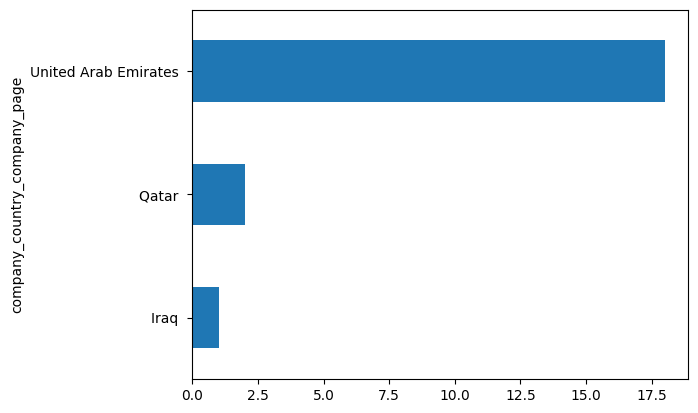

In [29]:
company_countries_unequal[company_countries_unequal['company_country_companies_page'] == "Saudi Arabia"]['company_country_company_page'].value_counts()[::-1].plot(kind="barh")

### This shows that some companies recruiting in Uganda either have addresses in both Saudi and UAE (especially, but also Qatar, Iraq and other countries) or are based in these other countries but working in Saudi.

In [30]:
column = df.pop('job_description')
df.insert(28, 'job_description', column)
df.head()

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years
0,5 KMG INTERNATIONAL LTD,https://eemis.mglsd.go.ug/companies/5KMGINTERN...,OLD KAMPALA,NaN,+256-709-696959,"15 Apr, 2024 - 14 Apr, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,E24040010,15/4/2024,14/4/2026,"KAMPALA, UGANDA, Kampala, Uganda",Uganda,+256-709-696959,5kmgint@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.314897,32.569796,Kampala,Uganda,0.315169,32.581631,Kampala,Uganda,0.314897,32.569796,NaN,NaN
1,AALAM ALTASHIRAT RECRUITMENT,https://eemis.mglsd.go.ug/companies/AALAMALTAS...,https://www.google.com/maps?sca_esv=567294360&...,NaN,+966-568-785468,"25 Nov, 2024 - 24 Nov, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,SA24110028,25/11/2024,24/11/2026,"Riyadh, Saudi Arabia",Saudi Arabia,+966-568-785468,aalamaltashirat@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saudi Arabia,False,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,24.713552,46.675296,Riyadh,Saudi Arabia,24.713552,46.675296,NaN,NaN
2,ABBA PLACEMENTS RECRUITMENT AGENCY LTD,https://eemis.mglsd.go.ug/companies/ABBAPLACEM...,NEXT TO UGANDA SWEATERS AFTER TOTAL KAMWOKYA,NaN,+256-760-863622,"20 Jan, 2023 - 19 Jan, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,E23010018,20/1/2023,19/1/2025,"Kampala, Uganda",Uganda,+256-760-863622,abbaplacements@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.339221,32.586694,Kampala Central Division,Uganda,0.315169,32.581631,Kampala,Uganda,0.339221,32.586694,NaN,NaN
3,ABDULLAH YOUSAF ALMAZROUA RECRUITMENT OFFICE,https://eemis.mglsd.go.ug/companies/AbdullahYo...,"Riyadh ,Saudi Arabia",Saudi Arabia,+966-559-252000,"01 Aug, 2024 - 31 Jul, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,SA24080002,01/8/2024,31/7/2026,"Ar Riyad, Saudi Arabia",Saudi Arabia,+966-559-252000,A.y.966ksa@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saudi Arabia,False,NaN,NaN,NaN,0.0,0.0,24.713552,46.675296,SA,Saudi Arabia,24.713552,46.675296,Riyadh,Saudi Arabia,24.713552,46.675296,NaN,NaN
4,ABS CONSULTING GROUP LIMITED,https://eemis.mglsd.go.ug/companies/ABSCONSULT...,PILKINGTON ROAD,NaN,+256-414-255405,"31 Jul, 2023 - 30 Jul, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,E23070023,31/7/2023,30/7/2025,"Kampala, Uganda",Uganda,+256-414-255405,absconsultinggroup9@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.31412,32.582295,Kampala,Uganda,0.315169,32.581631,Kampala,Uganda,0.314120,32.582295,NaN,NaN


<Axes: >

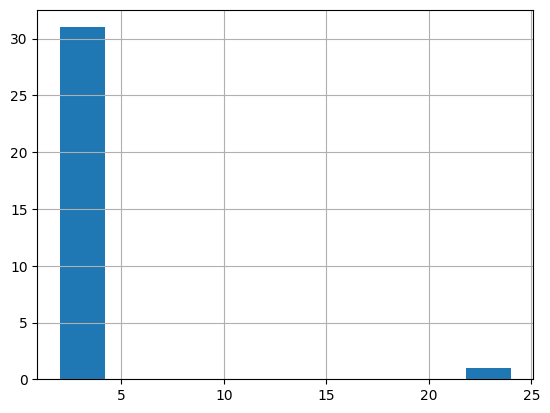

In [31]:
(
    df
    [df['job_length_years'] > 0]
    ['job_length_years'].hist()
)

## Almost all jobs are listed as exactly two years long.

In [32]:
df_list_dicts = df.to_dict(orient='records')
df_list_dicts[0:5]

[{'company_name': '5 KMG INTERNATIONAL LTD',
  'company_url_eemis': 'https://eemis.mglsd.go.ug/companies/5KMGINTERNATIONALLTD_13862400',
  'company_location_companies_page': 'OLD KAMPALA',
  'company_country_companies_page': nan,
  'company_phone_companies_page': '+256-709-696959',
  'company_calendar': '15 Apr, 2024 - 14 Apr, 2026',
  'logo_link': 'https://eemis.mglsd.go.ug/assets/images/brands/comp_1520_1702655030.jpeg',
  'license_no': 'E24040010',
  'start_date_company_page_DDMMYYYY': '15/4/2024',
  'expiry_date_company_page_DDMMYYYY': '14/4/2026',
  'company_address_company_page': 'KAMPALA, UGANDA, Kampala, Uganda ',
  'company_country_company_page': 'Uganda ',
  'company_phone_company_page': ' +256-709-696959 ',
  'company_email_company_page': ' 5kmgint@gmail.com ',
  'active_company': True,
  'job_name_jobs_list': nan,
  'job_page_link': nan,
  'jobs_country_jobs_list': nan,
  'job_posted_date': nan,
  'job_deadline': nan,
  'job_salary_jobs_list': nan,
  'job_page_full_url': na

In [33]:
import re

all_words = []

for company in df_list_dicts:
    if not pd.isna(company['job_description']):
        all_words_company = company['job_description'].lower()
        all_words_company2 = re.findall(r"\b\w+\b'?[s]?",all_words_company)
        #print(all_words_company2)
        all_words.append(all_words_company2)

all_words

[['female',
  'house',
  'drivers',
  'are',
  'needed',
  'in',
  'saudi',
  'arabia',
  'to',
  'work',
  'for',
  'a',
  'contract',
  'period',
  'of',
  '2',
  'years',
  'female',
  'house',
  'drivers',
  'are',
  'needed',
  'in',
  'saudi',
  'arabia',
  'to',
  'work',
  'for',
  'a',
  'contract',
  'period',
  'of',
  '2',
  'years'],
 ['housemaids',
  'needed',
  'to',
  'work',
  'in',
  'saudi',
  'arabia',
  'housemaids',
  'needed',
  'to',
  'work',
  'in',
  'saudi',
  'arabia'],
 ['to',
  'work',
  'in',
  'a',
  'household',
  'of',
  'the',
  'client',
  'helping',
  'with',
  'domestic',
  'work',
  'such',
  'as',
  'washing',
  'things',
  'cleaning',
  'cooking',
  'and',
  'looking',
  'after',
  'children',
  'to',
  'work',
  'in',
  'a',
  'household',
  'of',
  'the',
  'client',
  'helping',
  'with',
  'domestic',
  'work',
  'such',
  'as',
  'washing',
  'things',
  'cleaning',
  'cooking',
  'and',
  'looking',
  'after',
  'children'],
 ['we',
  'ar

In [34]:
# all_words_2 = []
# counter = 1
# this_word = "the"
# for job_desc in all_words:
#     for word in job_desc:
#         if word != this_word:
#             all_words_2.append({'word':this_word,'count':counter})
#             counter = 1
#             this_word = word
#         else:
#             counter +=1        

# all_words_2

[{'word': 'the', 'count': 1},
 {'word': 'female', 'count': 1},
 {'word': 'house', 'count': 1},
 {'word': 'drivers', 'count': 1},
 {'word': 'are', 'count': 1},
 {'word': 'needed', 'count': 1},
 {'word': 'in', 'count': 1},
 {'word': 'saudi', 'count': 1},
 {'word': 'arabia', 'count': 1},
 {'word': 'to', 'count': 1},
 {'word': 'work', 'count': 1},
 {'word': 'for', 'count': 1},
 {'word': 'a', 'count': 1},
 {'word': 'contract', 'count': 1},
 {'word': 'period', 'count': 1},
 {'word': 'of', 'count': 1},
 {'word': '2', 'count': 1},
 {'word': 'years', 'count': 1},
 {'word': 'female', 'count': 1},
 {'word': 'house', 'count': 1},
 {'word': 'drivers', 'count': 1},
 {'word': 'are', 'count': 1},
 {'word': 'needed', 'count': 1},
 {'word': 'in', 'count': 1},
 {'word': 'saudi', 'count': 1},
 {'word': 'arabia', 'count': 1},
 {'word': 'to', 'count': 1},
 {'word': 'work', 'count': 1},
 {'word': 'for', 'count': 1},
 {'word': 'a', 'count': 1},
 {'word': 'contract', 'count': 1},
 {'word': 'period', 'count': 1

## ^ But this did not work. I looked up another approach using defaultdict

In [35]:
from collections import defaultdict

word_counts = defaultdict(int)

for job_desc in all_words:
    for word in job_desc:
        word_counts[word] += 1  

all_words_3 = [{'word': word, 'count': count} for word, count in word_counts.items()]

all_words_3

[{'word': 'female', 'count': 10},
 {'word': 'house', 'count': 34},
 {'word': 'drivers', 'count': 4},
 {'word': 'are', 'count': 18},
 {'word': 'needed', 'count': 10},
 {'word': 'in', 'count': 30},
 {'word': 'saudi', 'count': 10},
 {'word': 'arabia', 'count': 10},
 {'word': 'to', 'count': 52},
 {'word': 'work', 'count': 26},
 {'word': 'for', 'count': 32},
 {'word': 'a', 'count': 40},
 {'word': 'contract', 'count': 6},
 {'word': 'period', 'count': 6},
 {'word': 'of', 'count': 38},
 {'word': '2', 'count': 6},
 {'word': 'years', 'count': 8},
 {'word': 'housemaids', 'count': 14},
 {'word': 'household', 'count': 4},
 {'word': 'the', 'count': 52},
 {'word': 'client', 'count': 6},
 {'word': 'helping', 'count': 10},
 {'word': 'with', 'count': 10},
 {'word': 'domestic', 'count': 18},
 {'word': 'such', 'count': 8},
 {'word': 'as', 'count': 16},
 {'word': 'washing', 'count': 18},
 {'word': 'things', 'count': 2},
 {'word': 'cleaning', 'count': 22},
 {'word': 'cooking', 'count': 12},
 {'word': 'and',

## How many instances of "she" versus. "he" in the job description?

In [36]:
for word in all_words_3:
    if word['word'] == 'she':
        print(word['count'])

8


In [37]:
for word in all_words_3:
    if word['word'] == 'he':
        print(word['count'])

In [38]:
for word in all_words_3:
    if word['word'] == 'female':
        print(word['count'])

10


In [39]:
for word in all_words_3:
    if word['word'] == 'male':
        print(word['count'])

2


In [40]:
df_words = pd.json_normalize(all_words_3)
df_words

,word,count
0,female,10
1,house,34
2,drivers,4
3,are,18
4,needed,10
...,...,...
292,works,2
293,houses,2
294,iron,2
295,applicants,2


In [41]:
df_words.sort_values(by='count', ascending=False).head(60)

,word,count
30,and,90
19,the,52
8,to,52
11,a,40
14,of,38
1,house,34
10,for,32
5,in,30
9,work,26
28,cleaning,22


In [42]:
df_words.sort_values(by='count', ascending=False).tail(60)

,word,count
84,variety,2
109,perform,2
110,clearing,2
111,tables,2
112,sanitizing,2
113,areas,2
114,miad,2
115,male,2
116,age,2
71,any,2


## What is the distribution of salaries?

In [44]:
df[df['usd_conversion'] > 0]['usd_conversion'].value_counts().sort_values(ascending=False)

usd_conversion
240.00    26
320.00     4
503.74     1
326.75     1
Name: count, dtype: int64

<Axes: >

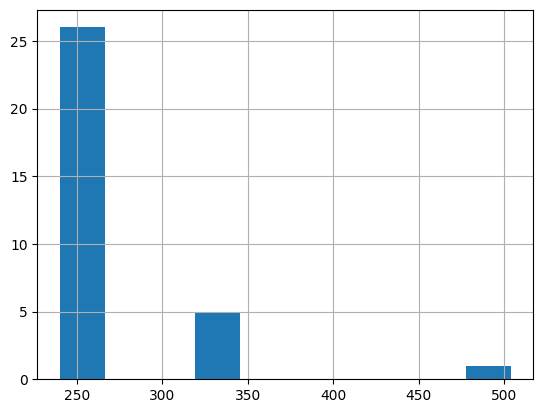

In [45]:
df[df['usd_conversion'] > 0]['usd_conversion'].sort_values(ascending=False).hist()

### Salaries for jobs listed as housemaids?

In [46]:
(
    df
    [df['job_name_job_page'] == 'housemaid']
    ['usd_conversion'].value_counts()
)

usd_conversion
240.0    25
Name: count, dtype: int64

## How long are most of the jobs that are currently posted?

In [47]:
df['job_length_years'].value_counts()

job_length_years
2.0     31
24.0     1
Name: count, dtype: int64

In [48]:
df['job_length_years'].median()

2.0

<Axes: >

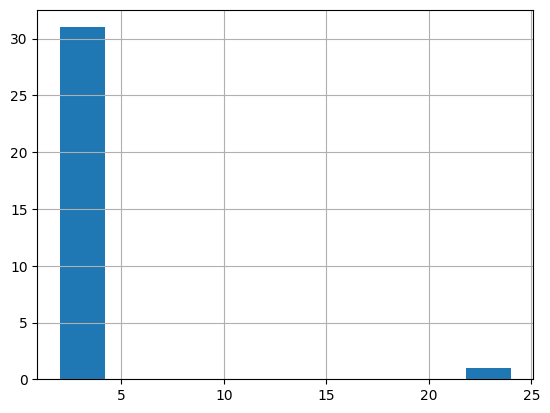

In [50]:
df['job_length_years'].hist()

## Where are most of the job postings? 

In [51]:
df['job_country_job_page'].value_counts()

job_country_job_page
Saudi Arabia            30
United Arab Emirates     2
Name: count, dtype: int64

<Axes: ylabel='job_country_job_page'>

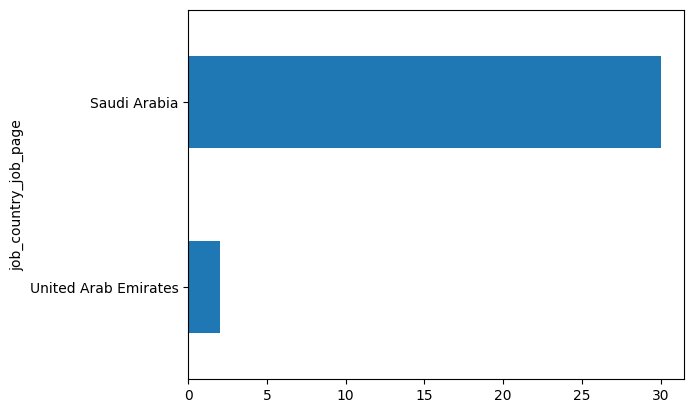

In [52]:
df['job_country_job_page'].value_counts()[::-1].plot(kind="barh")

## What are the main types of jobs? 

In [53]:
df['job_category'].value_counts()

job_category
Domestic Worker                       27
Other                                  2
Hospitality/Leisure/Travel             1
Transport , Logistics, Procurement     1
Sales/Business Development             1
Name: count, dtype: int64

<Axes: ylabel='job_category'>

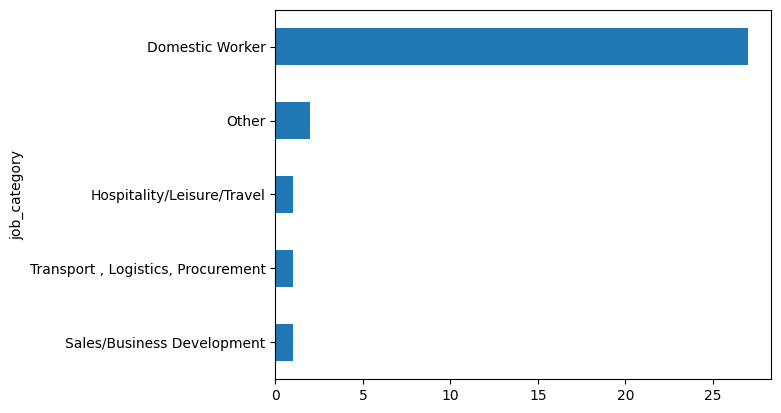

In [54]:
df['job_category'].value_counts()[::-1].plot(kind="barh")

### Another way to answer

In [55]:
df['job_name_job_page'].value_counts()

job_name_job_page
housemaid                 25
house driver               2
waiter                     1
bike delivery personel     1
sales                      1
domestic worker            1
female cleaner             1
Name: count, dtype: int64

<Axes: ylabel='job_name_job_page'>

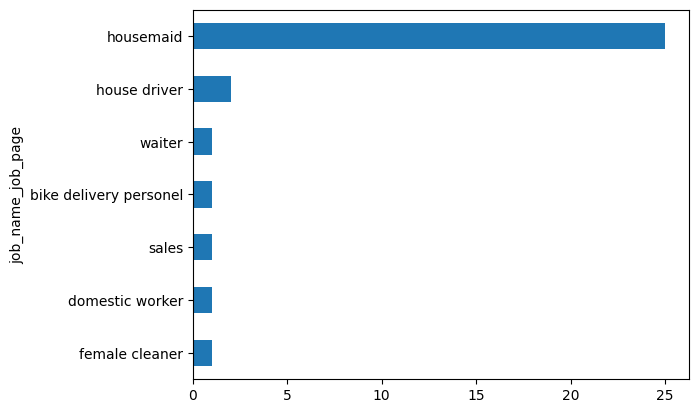

In [56]:
df['job_name_job_page'].value_counts()[::-1].plot(kind="barh")

## Where are jobs located hiring domestic workers (listed job name: housemaid)?

In [57]:
(
    df
    [df['job_name_job_page'] == 'housemaid']
    ['job_country_job_page'].value_counts()
)

job_country_job_page
Saudi Arabia    25
Name: count, dtype: int64

## Where are most of the companies hiring domestic workers located?

### Trying it first by the geo-coded locations from addresses listed on the overall companies page

In [58]:
(
    df
    [df['job_name_job_page'] == 'housemaid']
    ['company_country_companies_page'].value_counts()
)

company_country_companies_page
KAMPALA                          1
KAWEMPE                          1
GPO UGANDA CENTRAL KAMPALA       1
KANSANGA                         1
LUTHULI DRIVE                    1
Old Kampala                      1
Uganda                           1
OFF BALINTUNA NABULAGALA ROAD    1
OPPOSITE NWSC OFFICES            1
OLD PORTBELL ROAD                1
NTINDA                           1
Name: count, dtype: int64

### ^ Not accurate

### Now trying it by the locations listed on each company's page

In [59]:
(
    df
    [df['job_name_job_page'] == 'housemaid']
    ['company_country_company_page'].value_counts()
)

company_country_company_page
Uganda     25
Name: count, dtype: int64

## When were the companies registered that are recruiting?

In [60]:
df['company_reg_year'] = df['company_reg_date_MMDDYYYY'].str.extract(r'[/](\d{4})$')
df.head()

,company_name,company_url_eemis,company_location_companies_page,company_country_companies_page,company_phone_companies_page,company_calendar,logo_link,license_no,start_date_company_page_DDMMYYYY,expiry_date_company_page_DDMMYYYY,company_address_company_page,company_country_company_page,company_phone_company_page,company_email_company_page,active_company,job_name_jobs_list,job_page_link,jobs_country_jobs_list,job_posted_date,job_deadline,job_salary_jobs_list,job_page_full_url,job_name_job_page,company_name_job_page,job_country_job_page,job_salary_job_page,job_category,job_overview,job_description,job_description_details,company_reg_date_MMDDYYYY,company_phone_jobs_page,company_address_country_job_page,active_job,job_start_date_MMDDYYYY,job_end_date_MMDDYYYY,job_salary_currency_job_page,usd_conversion,job_salary_amount_job_page,latitude_company_location_companies_page,longitude_company_location_companies_page,city_company_location_companies_page,country_company_location_companies_page,latitude_company_location_company_page,longitude_company_location_company_page,city_company_location_company_page,country_company_location_company_page,latitude_map,longitude_map,job_length_days,job_length_years,company_reg_year
0,5 KMG INTERNATIONAL LTD,https://eemis.mglsd.go.ug/companies/5KMGINTERN...,OLD KAMPALA,NaN,+256-709-696959,"15 Apr, 2024 - 14 Apr, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,E24040010,15/4/2024,14/4/2026,"KAMPALA, UGANDA, Kampala, Uganda",Uganda,+256-709-696959,5kmgint@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.314897,32.569796,Kampala,Uganda,0.315169,32.581631,Kampala,Uganda,0.314897,32.569796,NaN,NaN,NaN
1,AALAM ALTASHIRAT RECRUITMENT,https://eemis.mglsd.go.ug/companies/AALAMALTAS...,https://www.google.com/maps?sca_esv=567294360&...,NaN,+966-568-785468,"25 Nov, 2024 - 24 Nov, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,SA24110028,25/11/2024,24/11/2026,"Riyadh, Saudi Arabia",Saudi Arabia,+966-568-785468,aalamaltashirat@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saudi Arabia,False,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,24.713552,46.675296,Riyadh,Saudi Arabia,24.713552,46.675296,NaN,NaN,NaN
2,ABBA PLACEMENTS RECRUITMENT AGENCY LTD,https://eemis.mglsd.go.ug/companies/ABBAPLACEM...,NEXT TO UGANDA SWEATERS AFTER TOTAL KAMWOKYA,NaN,+256-760-863622,"20 Jan, 2023 - 19 Jan, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,E23010018,20/1/2023,19/1/2025,"Kampala, Uganda",Uganda,+256-760-863622,abbaplacements@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.339221,32.586694,Kampala Central Division,Uganda,0.315169,32.581631,Kampala,Uganda,0.339221,32.586694,NaN,NaN,NaN
3,ABDULLAH YOUSAF ALMAZROUA RECRUITMENT OFFICE,https://eemis.mglsd.go.ug/companies/AbdullahYo...,"Riyadh ,Saudi Arabia",Saudi Arabia,+966-559-252000,"01 Aug, 2024 - 31 Jul, 2026",https://eemis.mglsd.go.ug/assets/images/brands...,SA24080002,01/8/2024,31/7/2026,"Ar Riyad, Saudi Arabia",Saudi Arabia,+966-559-252000,A.y.966ksa@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saudi Arabia,False,NaN,NaN,NaN,0.0,0.0,24.713552,46.675296,SA,Saudi Arabia,24.713552,46.675296,Riyadh,Saudi Arabia,24.713552,46.675296,NaN,NaN,NaN
4,ABS CONSULTING GROUP LIMITED,https://eemis.mglsd.go.ug/companies/ABSCONSULT...,PILKINGTON ROAD,NaN,+256-414-255405,"31 Jul, 2023 - 30 Jul, 2025",https://eemis.mglsd.go.ug/assets/images/brands...,E23070023,31/7/2023,30/7/2025,"Kampala, Uganda",Uganda,+256-414-255405,absconsultinggroup9@gmail.com,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda,False,NaN,NaN,NaN,0.0,0.0,0.31412,32.582295,Kampala,Uganda,0.315169,32.581631,Kampala,Uganda,0.314120,32.582295,NaN,NaN,NaN


<Axes: >

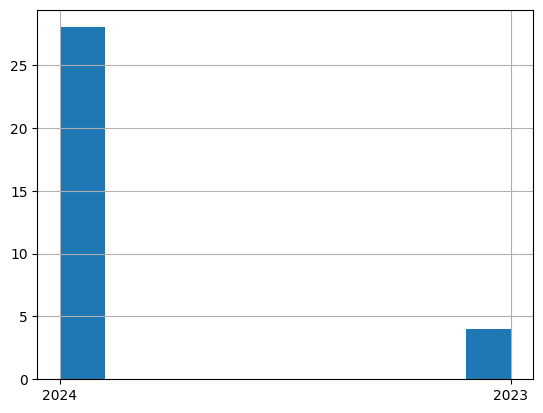

In [61]:
df['company_reg_year'].hist()

In [63]:
df.to_csv("cleaned_cleaned_data_eemis.csv", index=False)